# Carico le ricette

In [79]:
import pickle

with open('tasty_ingredients.pkl', 'rb') as handle:
    tasty_ingredients = pickle.load(handle)

with open('giallo_ingredients.pkl', 'rb') as handle:
    giallo_ingredients = pickle.load(handle)  
    
with open('giallo_ingredients_ita.pkl', 'rb') as handle:
    giallo_ingredients_ita = pickle.load(handle)  
    
giallo_ingredients_ita = [[ing.lower() for ing in recipe] for recipe in giallo_ingredients_ita]
giallo_ingredients.extend(giallo_ingredients_ita)

## Parole univoche

In [80]:
import re
regex = re.compile('[^a-zA-Z ]')
words = set()

for recipe in tasty_ingredients + giallo_ingredients:
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        ingredient_words = ingredient.split()
        for w in ingredient_words:
            words.add(w.lower())

print(f"Abbiamo {len(words)} parole univoche")
#print(words)     

Abbiamo 2283 parole univoche


# Lista di ingredienti trovata online

In [81]:
import json
import numpy as np

with open('ingredients.json', 'rb') as handle:
    ingredients_list = json.load(handle)  
    
ingredients_list = [ingredient["name"].lower() for ingredient in ingredients_list["tags"] if len(ingredient["name"].lower()) > 2]

ingredients_list = np.array(ingredients_list)
len(ingredients_list)

9932

# Sociomatrice

In [82]:
ingredients_dictionary = {
    "salt": ["salt"],
    "sugar": ["sugar"],
    "water": ["water", "ice"],
    "cereals": ["cereal", "cereals", "oat", "barley", "malt", "flakes"], # cereali 
    "oil": ["oil"],
    "flour": ["flour", "starch"], #farina-amido
    "fruits": ["apple", "apples", "grape", "orange", "oranges", "strawberry", "strawberries",
               "raspberry", "pineapple", "cranberry", "cherry", "cherries", "banana", "bananas",
               "mango", "mangos", "cucumber", "peach", "peaches", "kiwi", "kiwis", "berries",
               "plum", "plums", "melon", "cider", "lemon", "lemons"],
    "milk": ["milk"],
    "seeds": ["seed", "seeds", "nut", "nuts", "almond", "almonds", "peanut", "peanuts", "sesame",
              "hazelnut"],
    "onion": ["onion"],
    "garlic": ["garlic"],
    "chocolate": ["cocoa", "chocolate", "dark-chocolate"],
    "yeast": ["yeast", "sourdough"], # lievito
    "egg": ["egg", "eggs"],
    "vinegar": ["vinegar"], #aceto
    "tomato": ["tomato", "passato", "passata"],
    "cream": ["cream"],
    "rice": ["rice", "rices"],
    "corn": ["corn"],
    "cheese": ["cheese", "cheddar", "mozzarella", "parmisan", "parmigiano", "grana", "pecorino",
               "gorgonzola", "taleggio", "caciotta", "ricotta", "provola", "provolone",
               "mascarpone", "montasio", "piave", "asiago", "puzzone", "quartirolo",
               "scamorza", "stracchino"],
    "butter": ["butter"],
    "red meat": ["pork", "ham", "bacon", "salami", "beef", "veal"], # maiale
    "white meat": ["chicken", "chickens" "bun", "turquey", "fowl"], # manzo
    "potato": ["potato", "potatos"],
    "honey": ["honey"],
    "paprika": ["paprika"],
    "mustard": ["mustard"],
    "turmeric": ["turmeric"], # curcuma
    "ginger": ["ginger"],
    "parsley": ["parsley"],
    "wine": ["wine"],
    "chili": ["chili", "jalapeno"],
    "mushrooms": ["mushroom", "mushrooms"],
    "bread": ["bread"],
    "pasta": ["pasta"],
    "fish": ["fish", "salmon", "swordfish", "cod", "codfish", "sardines", "tuna", "trout", "trouts",
             "mackerel", "mackerels", "herring", "herrings", "hailbut", "halibuts"],
    "seafood": ["seafood", "lobsters", "mussels", "crab", "crabs", "shrimp", "crayfish",
                "prawn", "clams", "squid", "squids", "octopus"],
    "veggies": ["spinach", "fennel", "carrot", "carrots", "celery", "celeries", "peppers",
                "cabbage", "kale", ],
    "legumes": ["chickpea", "chickpeas", "pea", "peas", "beans", "bean", "soy", "lentils"],
    "pepper": ["peppercorns", "pepper"]
}

In [83]:
import numpy as np
regex = re.compile('[^a-zA-Z ]')
import itertools

ingredients_list = np.array(list(ingredients_dictionary.keys()))
n = len(ingredients_dictionary)
socio_giallo = np.zeros((n,n))
socio_tasty = np.zeros((n,n))

n_rec_giallo =len(giallo_ingredients)
n_rec_tasty = len(tasty_ingredients)

subsampled_indexes = np.random.choice(n_rec_tasty, size=n_rec_giallo, replace=True)
tasty_ingredients = [tasty_ingredients[i] for i in subsampled_indexes]

for recipe in tasty_ingredients:
    ingredients_in_recipe = set()
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        for key_food, psuedo_list in ingredients_dictionary.items():
            for w in psuedo_list:
                if w in ingredient:
                    ingredients_in_recipe.add(key_food)
    for subset in itertools.combinations(ingredients_in_recipe, 2):
        i = np.argwhere(subset[0] == ingredients_list)
        j = np.argwhere(subset[1] == ingredients_list)
        socio_tasty[i, j] += 1
        socio_tasty[j, i] += 1
    
for recipe in giallo_ingredients:
    ingredients_in_recipe = set()
    for ingredient in recipe:
        ingredient = regex.sub('', ingredient)
        for key_food, psuedo_list in ingredients_dictionary.items():
            for w in psuedo_list:
                if w in ingredient:
                    ingredients_in_recipe.add(key_food)
    for subset in itertools.combinations(ingredients_in_recipe, 2):
        i = np.argwhere(subset[0] == ingredients_list)
        j = np.argwhere(subset[1] == ingredients_list)
        socio_giallo[i, j] += 1
        socio_giallo[j, i] += 1

In [84]:
# idxs = np.argwhere(np.all(socio_giallo == 0, axis=0))
# socio_giallo = np.delete(socio_giallo, idxs, axis=0)
# socio_giallo = np.delete(socio_giallo, idxs, axis=1)
# giallo_ingredients = ingredients_list[np.array([idx for idx in range(len(ingredients_list)) if idx not in idxs])]

# idxs = np.argwhere(np.all(socio_tasty == 0, axis=0))
# socio_tasty = np.delete(socio_tasty, idxs, axis=0)
# socio_tasty = np.delete(socio_tasty, idxs, axis=1)
# tasty_ingredients = ingredients_list[np.array([idx for idx in range(len(ingredients_list)) if idx not in idxs])]

In [85]:
import networkx as nx

G_giallo = nx.from_numpy_array(socio_giallo)

n_recipes = len(giallo_ingredients)
n = socio_giallo.shape[0]

grand_mean = np.sum(socio_giallo)/(n * (n-1)) # no diagonal
connections_density = np.sum(socio_giallo!=0)/(n * (n-1)) # no diagonal

# Sono uguali perchè la matrice è simmetrica
row_mean = np.mean(socio_giallo_df, axis=1)
col_mean = np.mean(socio_giallo_df, axis=0)

diameter = nx.diameter(G_giallo)
max_degree = np.max(socio_giallo)

mean_ingr_per_recipe = np.mean([len(l) for l in giallo_ingredients])

print("------------------------------------------------------------------------------------------")
print(f"""
      GIALLO SOCIOMATRIX:
      *** There are {n_recipes} recipes.
      *** There are {n} ingredients.
      *** There are {round(mean_ingr_per_recipe,2)} ingredients per recipe, in mean.
      *** Grand mean: {round(grand_mean,2)} interactions per couple of ingredients.
      *** Edge density: {round(connections_density*100,2)}%
      *** Diameter: {diameter}
      *** Max degree: {int(max_degree)}
      """)
print("------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------

      GIALLO SOCIOMATRIX:
      *** There are 1387 recipes.
      *** There are 40 ingredients.
      *** There are 10.67 ingredients per recipe, in mean.
      *** Grand mean: 40.71 interactions per couple of ingredients.
      *** Edge density: 84.49%
      *** Diameter: 2
      *** Max degree: 754
      
------------------------------------------------------------------------------------------


In [86]:
G_tasty = nx.from_numpy_array(socio_tasty)

n_recipes = len(tasty_ingredients)
n = socio_tasty.shape[0]

grand_mean = np.sum(socio_tasty)/(n * (n-1)) # no diagonal
connections_density = np.sum(socio_tasty!=0)/(n * (n-1)) # no diagonal

# Sono uguali perchè la matrice è simmetrica
row_mean = np.mean(socio_tasty_df, axis=1)
col_mean = np.mean(socio_tasty_df, axis=0)

diameter = nx.diameter(G_tasty)
max_degree = np.max(socio_tasty)

mean_ingr_per_recipe = np.mean([len(l) for l in tasty_ingredients])

print("------------------------------------------------------------------------------------------")
print(f"""
      TASTY SOCIOMATRIX:
      *** There are {n_recipes} recipes.
      *** There are {n} ingredients.
      *** There are {round(mean_ingr_per_recipe,2)} ingredients per recipe, in mean.
      *** Grand mean: {round(grand_mean,2)} interactions per couple of ingredients.
      *** Edge density: {round(connections_density*100,2)}%
      *** Diameter: {diameter}
      *** Max degree: {int(max_degree)}
      """)
print("------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------

      TASTY SOCIOMATRIX:
      *** There are 1387 recipes.
      *** There are 40 ingredients.
      *** There are 9.2 ingredients per recipe, in mean.
      *** Grand mean: 51.15 interactions per couple of ingredients.
      *** Edge density: 95.26%
      *** Diameter: 2
      *** Max degree: 657
      
------------------------------------------------------------------------------------------


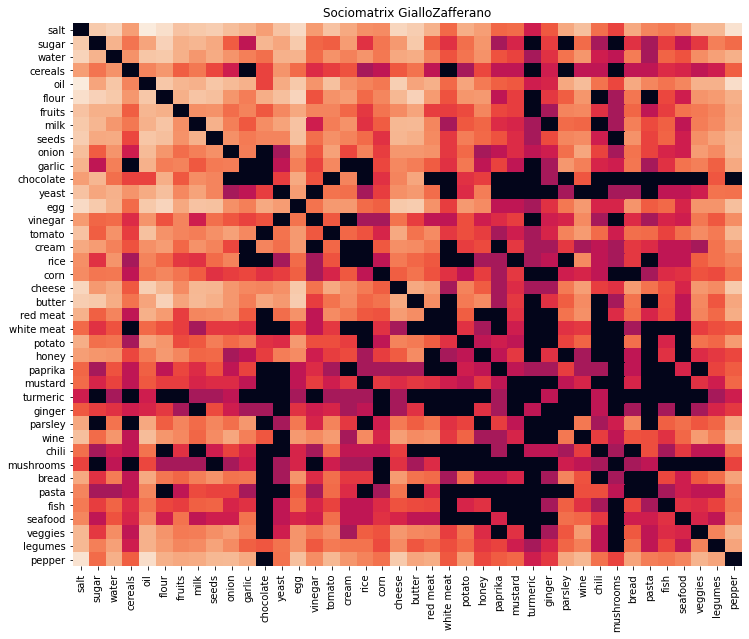

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['grid.linestyle'] = "dashed"
import seaborn as sns

plt.figure(figsize=(12,10))

socio_giallo_df = pd.DataFrame(socio_giallo,
                               columns=ingredients_list, index=ingredients_list)

sns.heatmap(np.log(socio_giallo_df + 0.01), annot=False, cbar = False)
plt.title("Sociomatrix GialloZafferano")
plt.show()

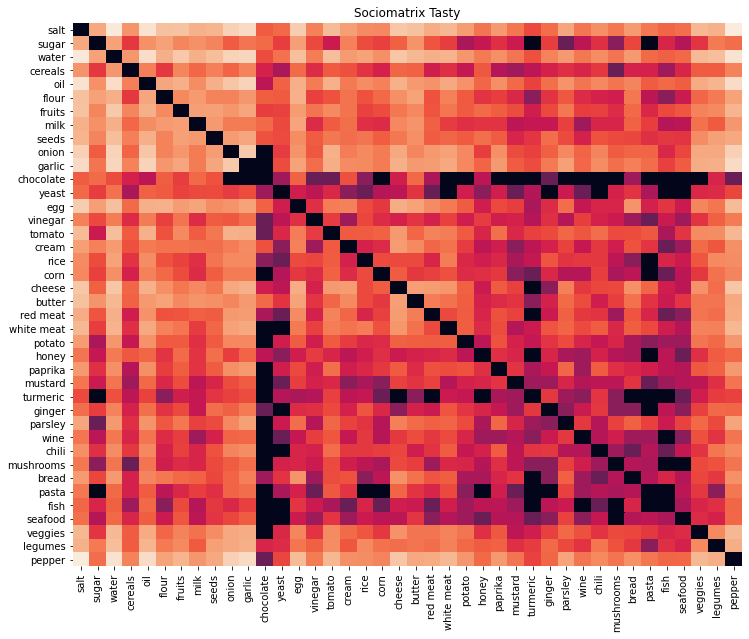

In [88]:
plt.figure(figsize=(12,10))

socio_tasty_df = pd.DataFrame(socio_tasty,
                               columns=ingredients_list, index=ingredients_list)

sns.heatmap(np.log(socio_tasty_df + 0.1), annot=False, cbar = False)
plt.title("Sociomatrix Tasty")
plt.show()